In [1]:
import os
import re
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

load data

In [2]:
data_dir = Path("comphep_data")

In [3]:
dcrsc_cos = np.genfromtxt(data_dir/"dcrsc_cos.dat", dtype=np.float64)
dcrsc_t = np.genfromtxt(data_dir/"dcrsc_t.dat", dtype=np.float64)[:, [0, 1]]
totcrsc_lowS = np.genfromtxt(data_dir/"totcrsc_lowS.dat", dtype=np.float64)
totcrsc_tail = np.genfromtxt(data_dir/"totcrsc_tail.dat", dtype=np.float64)
totcrsc_Zpeak = np.genfromtxt(data_dir/"totcrsc_Zpeak.dat", dtype=np.float64)
totcrsc_Hpeak = np.genfromtxt(data_dir/"totcrsc_Hpeak.dat", dtype=np.float64)
totcrsc_wide = np.genfromtxt(data_dir/"totcrsc_wide.dat", dtype=np.float64)
fbasym = np.genfromtxt(data_dir/"fbasym.dat", dtype=np.float64)
fbasym_wide = np.genfromtxt(data_dir/"fbasym_wide.dat", dtype=np.float64)

In [4]:
output_dir = Path("output")

In [5]:
plots_dir = output_dir/"visualized"
os.makedirs(str(plots_dir), exist_ok=True)

In [6]:
def parse_expression(expr):
    """ FORM output to Python """
    spaces = re.compile(r"\s+")
    linear = re.sub(spaces, "", expr.replace("\n", "").split("=")[1])[:-1]
    special = linear.replace("PI", "np.pi").replace("SQRT", "np.sqrt").replace("^", "**")
    return special

kinematics here

In [7]:
def get_t_range(s):
    E1cm = np.sqrt(s)/2
    p1cm = np.sqrt(E1cm**2 - mMu**2)
    E3cm = E1cm
    p3cm = np.sqrt(E3cm**2 - mB**2)
    return -(p1cm - p3cm)**2, -(p1cm + p3cm)**2

In [8]:
def t2cos(s, t):
    E1cm = np.sqrt(s)/2
    p1cm = np.sqrt(E1cm**2 - mMu**2)
    E3cm = E1cm
    p3cm = np.sqrt(E3cm**2 - mB**2)
    return 1 - 2*(-(p1cm - p3cm)**2-t)/4/p1cm/p3cm

In [9]:
def cos2t(s, c):
    E1cm = np.sqrt(s)/2
    p1cm = np.sqrt(E1cm**2 - mMu**2)
    E3cm = E1cm
    p3cm = np.sqrt(E3cm**2 - mB**2)
    return (p1cm - p3cm)**2 - (1 - c)/2*4*p1cm*p3cm

define parameters (based on comphep default)

In [10]:
mMu = 105E-3;
mB = 4.85;
mW = 80.;
mH = 115.;
mZ = 91.2;
e = 0.313;
Qb = -1/3;
sW = 0.48076;
gW = e/sW;
gZ = e/sW/np.sqrt(1 - sW**2);
wZ = 2.43;
wH = 0.00617

print(f"mMu = {mMu}")
print(f"mB = {mB}")
print(f"mW = {mW}")
print(f"mH = {mH}")
print(f"mZ = {mZ}")
print(f"e = {e}")
print(f"sW = {sW}")
print(f"gW = {gW}")
print(f"gZ = {gZ}")
print(f"wZ = {wZ}")
print(f"wH = {wH}")

mMu = 0.105
mB = 4.85
mW = 80.0
mH = 115.0
mZ = 91.2
e = 0.313
sW = 0.48076
gW = 0.651052500208004
gZ = 0.7424882808409303
wZ = 2.43
wH = 0.00617


Load **differential cross-section** and define python function which will evaluate it: 

In [11]:
with open(output_dir/"dcrsc.output", "r") as fin:
    dcrsc_raw = parse_expression(fin.read())
display(dcrsc_raw)

'+t*(3/16/(1/4*s-mMu**2)*e**4*Qb**2*s**-2*np.pi**-1-3/8/(1/4*s-mMu**2)*e**4*mMu**2*Qb**2*s**-3*np.pi**-1-3/8/(1/4*s-mMu**2)*e**4*mB**2*Qb**2*s**-3*np.pi**-1-3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*gW**2*mW**-2*Qb*s**-1*np.pi**-1+3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*mH**2*gW**2*mW**-2*Qb*s**-2*np.pi**-1+3/256/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*s*np.pi**-1-3/64/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*sW**2*s*np.pi**-1+3/64/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*sW**2*Qb*s*np.pi**-1-3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*sW**4*Qb*s*np.pi**-1-3/256/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ

In [12]:
def dcrsc(**kwargs):
    return eval(dcrsc_raw, globals(), kwargs)

#### Differential cross-section $\frac{d \sigma}{d t}$ 

In [13]:
def show_crsc_t(fig, ax, s):
    ts = dcrsc_t[:, 0]
    crsc = dcrsc(s=s, t=ts)/2.56819E-9
    ax.plot(ts, np.log10(crsc))
    ax.scatter(ts[::10], np.log10(dcrsc_t[::10, 1]), color="orange")
    fig.savefig(plots_dir/"dcrsc_t.png")

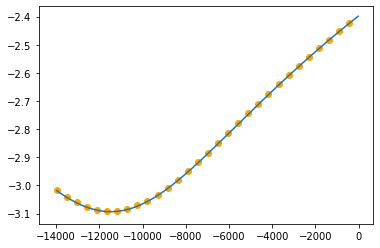

In [14]:
fig, ax = plt.subplots()
show_crsc_t(fig, ax, 120**2)

#### Differential cross-section $\frac{d \sigma}{d cos(\theta)}$ 

In [15]:
def show_crsc_costh(fig, ax, s):
    cs = dcrsc_cos[:, 0]
    ts = cos2t(s, cs)
    trange = get_t_range(s)
    # notice jacobian
    crsc = dcrsc(s=s, t=ts)*2*np.sqrt(s/4 - mMu**2)*np.sqrt(s/4 - mB**2)/2.56819E-9
    ax.plot(cs, np.log10(crsc))
    ax.scatter(cs[::5], np.log10(dcrsc_cos[::5, 1]), color="orange")
    fig.savefig(plots_dir/"dcrsc_cos.png")

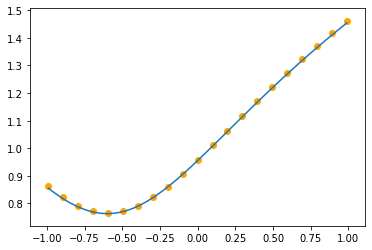

In [16]:
fig, ax = plt.subplots()
show_crsc_costh(fig, ax, 120**2)

Load **total crossection** and define corresponding python function

In [17]:
with open(output_dir/"totcrsc.output", "r") as fin:
    totcrsc_raw = parse_expression(fin.read())
display(totcrsc_raw)

'+t*(3/32/(1/4*s-mMu**2)*e**4*Qb**2*s**-1*np.pi**-1+3/16/(1/4*s-mMu**2)*e**4*mMu**4*Qb**2*s**-3*np.pi**-1+3/8/(1/4*s-mMu**2)*e**4*mB**2*mMu**2*Qb**2*s**-3*np.pi**-1+3/16/(1/4*s-mMu**2)*e**4*mB**4*Qb**2*s**-3*np.pi**-1-3/32/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*gW**2*mW**-2*Qb*np.pi**-1+3/32/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*mH**2*gW**2*mW**-2*Qb*s**-1*np.pi**-1+3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**4*gW**2*mW**-2*Qb*s**-1*np.pi**-1-3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**4*mH**2*gW**2*mW**-2*Qb*s**-2*np.pi**-1+3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**4*mMu**2*gW**2*mW**-2*Qb*s**-1*np.pi**-1-3/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**4*mMu**2*mH**2*gW**2*mW**-2*Qb*s**-2*np.pi**-1+3/1024/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*mB**2*mMu**2*gW**4*mW**-4*s**3*np.pi**-1-3/512/(

In [18]:
def totcrsc(**kwargs):
    trange = get_t_range(kwargs["s"])
    return eval(totcrsc_raw, globals(), dict(**kwargs, t=trange[0])) - eval(totcrsc_raw, globals(), dict(**kwargs, t=trange[1]))

#### Total crossection at low energies 

In [19]:
def show_totcrsc_lowS(fig, ax):
    sqrt_s = totcrsc_lowS[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(s=ss)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s[::5], np.log10(totcrsc_lowS[::5, 1]), color="orange")
    fig.savefig(plots_dir/"totcrsc_lowS.png")

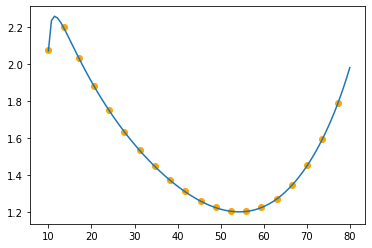

In [20]:
fig, ax = plt.subplots()
show_totcrsc_lowS(fig, ax)

In [21]:
def show_contrib_totcrsc_lowS(fig, ax):
    sqrt_s = totcrsc_lowS[:, 0]
    ss = sqrt_s**2
    
    # total
    crsc = totcrsc(s=ss)/2.56819E-9
    ax.plot(sqrt_s, crsc, lw=8, alpha=0.5)
    
    # photon
    crsc = totcrsc(s=ss, gW=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, crsc, ls="--")
    # Z
    crsc = totcrsc(s=ss, gW=0, e=0)/2.56819E-9
    ax.plot(sqrt_s, crsc, ls="--")
    # higgs
    crsc = totcrsc(s=ss, e=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, crsc, ls="--")
    
    fig.savefig(plots_dir/"totcrsc_lowS_contrib.png")

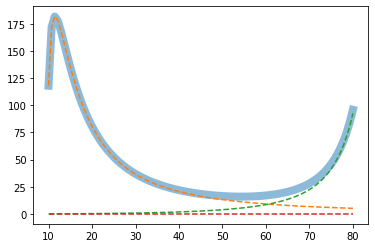

In [22]:
fig, ax = plt.subplots()
show_contrib_totcrsc_lowS(fig, ax)

#### Total cross-section at high energies (tail) 

In [23]:
def show_totcrsc_tail(fig, ax):
    sqrt_s = totcrsc_tail[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(s=ss)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s[::5], np.log10(totcrsc_tail[::5, 1]), color="orange")
    fig.savefig(plots_dir/"totcrsc_tail.png")

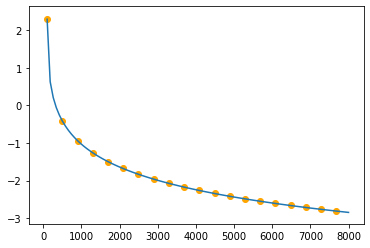

In [24]:
fig, ax = plt.subplots()
show_totcrsc_tail(fig, ax)

In [25]:
def show_contrib_totcrsc_tail(fig, ax):
    sqrt_s = totcrsc_tail[:, 0]
    ss = sqrt_s**2
    
    # total
    crsc = totcrsc(s=ss)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), lw=8, alpha=0.5)
    
    # photon
    crsc = totcrsc(s=ss, gW=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), ls="--")
    # Z
    crsc = totcrsc(s=ss, gW=0, e=0)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), ls="--")
    # higgs
    crsc = totcrsc(s=ss, e=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), ls="--")
    
    fig.savefig(plots_dir/"totcrsc_tail_contrib.png")

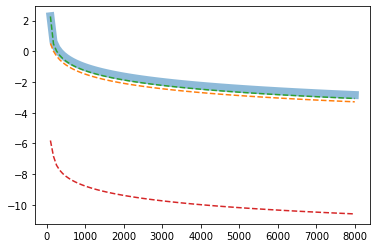

In [26]:
fig, ax = plt.subplots()
show_contrib_totcrsc_tail(fig, ax)

#### Total cross-section around Z-boson peak 

In [27]:
def show_totcrsc_Zpeak(fig, ax):
    sqrt_s = totcrsc_Zpeak[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(s=ss)/2.56819E-9    
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s[::5], np.log10(totcrsc_Zpeak[::5, 1]), color="orange")
    fig.savefig(plots_dir/"totcrsc_Zpeak.png")

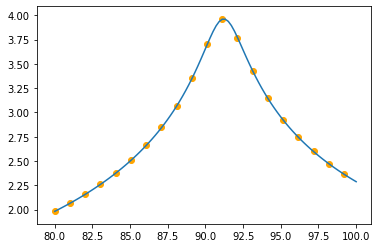

In [28]:
fig, ax = plt.subplots()
show_totcrsc_Zpeak(fig, ax)

In [29]:
def show_contrib_totcrsc_Zpeak(fig, ax):
    sqrt_s = totcrsc_Zpeak[:, 0]
    ss = sqrt_s**2
    
    # total
    crsc = totcrsc(s=ss)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), lw=8, alpha=0.5)
    
    # photon
    crsc = totcrsc(s=ss, gW=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), ls="--")
    # Z
    crsc = totcrsc(s=ss, gW=0, e=0)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), ls="--")
    # higgs
    crsc = totcrsc(s=ss, e=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc), ls="--")
    
    fig.savefig(plots_dir/"totcrsc_Zpeak_contrib.png")

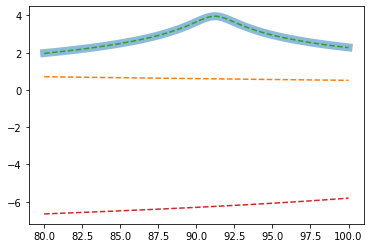

In [30]:
fig, ax = plt.subplots()
show_contrib_totcrsc_Zpeak(fig, ax)

#### Total cross-section around Higgs peak 

In [31]:
def show_totcrsc_Hpeak(fig, ax):
    sqrt_s = totcrsc_Hpeak[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(s=ss)/2.56819E-9    
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s, np.log10(totcrsc_Hpeak[:, 1]), color="orange")
    fig.savefig(plots_dir/"totcrsc_Hpeak.png")

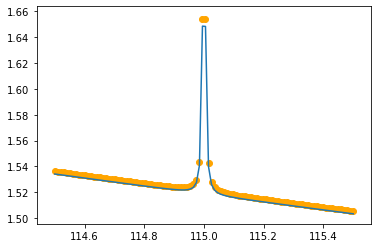

In [32]:
fig, ax = plt.subplots()
show_totcrsc_Hpeak(fig, ax)

In [33]:
def show_contrib_totcrsc_Hpeak(fig, ax):
    sqrt_s = totcrsc_Hpeak[:, 0]
    ss = sqrt_s**2
    
    # total
    crsc = totcrsc(s=ss)/2.56819E-9
    ax.plot(sqrt_s, crsc, lw=8, alpha=0.5)
    
    # photon
    crsc = totcrsc(s=ss, gW=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, crsc, ls="--")
    # Z
    crsc = totcrsc(s=ss, gW=0, e=0)/2.56819E-9
    ax.plot(sqrt_s, crsc, ls="--")
    # higgs
    crsc = totcrsc(s=ss, e=0, gZ=0)/2.56819E-9
    ax.plot(sqrt_s, crsc, ls="--")
    
    fig.savefig(plots_dir/"totcrsc_Hpeak_contrib.png")

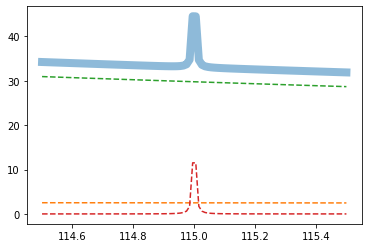

In [34]:
fig, ax = plt.subplots()
show_contrib_totcrsc_Hpeak(fig, ax)

#### Forward-backward asymmtery 

In [35]:
def calc_fb_asym(**kwargs):
    trange = get_t_range(kwargs["s"])
    tmid = (trange[0] + trange[1])/2.
    crsc_fwd = eval(totcrsc_raw, globals(), dict(**kwargs, t=trange[0])) - eval(totcrsc_raw, globals(), dict(**kwargs, t=tmid))
    crsc_bckwd = eval(totcrsc_raw, globals(), dict(**kwargs, t=tmid)) - eval(totcrsc_raw, globals(), dict(**kwargs, t=trange[1]))
    return (crsc_fwd - crsc_bckwd)/(crsc_fwd + crsc_bckwd)

In [36]:
def show_fb_asym(fig, ax):
    sqrt_s = fbasym[:, 0]
    ss = sqrt_s**2
    asym = calc_fb_asym(s=ss)
    ax.plot(sqrt_s, asym)
    asym = calc_fb_asym(s=ss, mMu=0.512, mB=1, Qf=2/3)
    ax.plot(sqrt_s, asym)
    ax.scatter(sqrt_s[::5], fbasym[::5, 1], color="orange")
    
    fig.savefig(plots_dir/"fbasym.png")

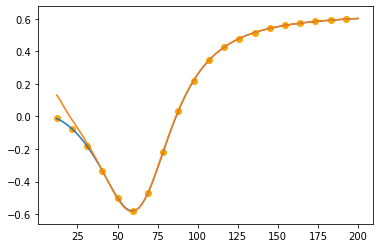

In [37]:
fig, ax = plt.subplots()
show_fb_asym(fig, ax)

In [38]:
def show_contrib_fbasym(fig, ax):
    sqrt_s = fbasym[:, 0]
    ss = sqrt_s**2
    
    # only Z
    asym = calc_fb_asym(s=ss, e=0, gW=0)/2.56819E-9
    ax[0].plot(sqrt_s, np.log10(asym))
    # no higgs
    # asym = calc_fb_asym(s=ss, gW=0)/2.56819E-9
    # ax.plot(sqrt_s, asym, ls="--")
    # only photon
    asym = calc_fb_asym(s=ss, gZ=0, gW=0)/2.56819E-9
    ax[1].plot(sqrt_s, asym)
    ax[1].set_ylim(-1, 1)
    fig.savefig(plots_dir/"fbasym_contrib.png")

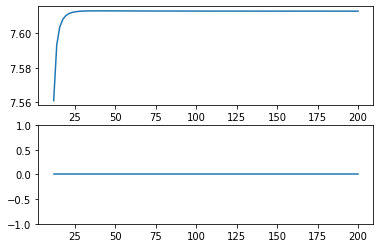

In [39]:
fig, ax = plt.subplots(2)
show_contrib_fbasym(fig, ax)

## Z' extension

In [40]:
dcrsc_cos_zprime = np.genfromtxt(data_dir/"dcrsc_cos_zprime.dat", dtype=np.float64)
totcrsc_zprime = np.genfromtxt(data_dir/"totcrsc_zprime.dat", dtype=np.float64)
fbasym_zprime = np.genfromtxt(data_dir/"fbasym_zprime.dat", dtype=np.float64)

In [41]:
def compare_two(fig, ax, a, b, alias, log=False):
    ax.plot(*a.T)
    ax.plot(*b.T)
    if log:
        ax.set_yscale("log")
    if alias is not None:
        fig.savefig(plots_dir/f"{alias}.png")

even at low energies (s=120GeV) differential cross section got a contribution from 300GeV Z'.

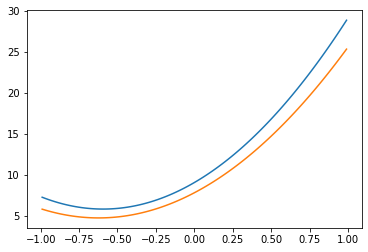

In [42]:
fig, ax = plt.subplots()
compare_two(fig, ax, dcrsc_cos, dcrsc_cos_zprime, "dcrsc_cos_zprime")

Total cross-section shows peak at s = mass of Z' (300GeV)

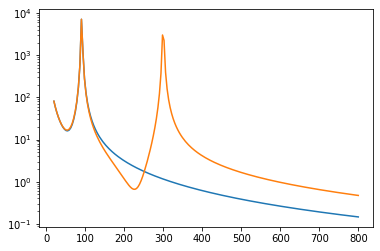

In [43]:
fig, ax = plt.subplots()
compare_two(fig, ax, totcrsc_wide, totcrsc_zprime, "totcrsc_zprime", log=True)

Z' boson generates an additional FB asymmetry dip

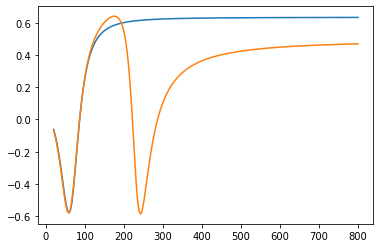

In [44]:
fig, ax = plt.subplots()
compare_two(fig, ax, fbasym_wide, fbasym_zprime, "fbasym_zprime")